cpu


512it [00:48, 10.53it/s]
512it [00:55,  9.15it/s]
512it [00:48, 10.63it/s]


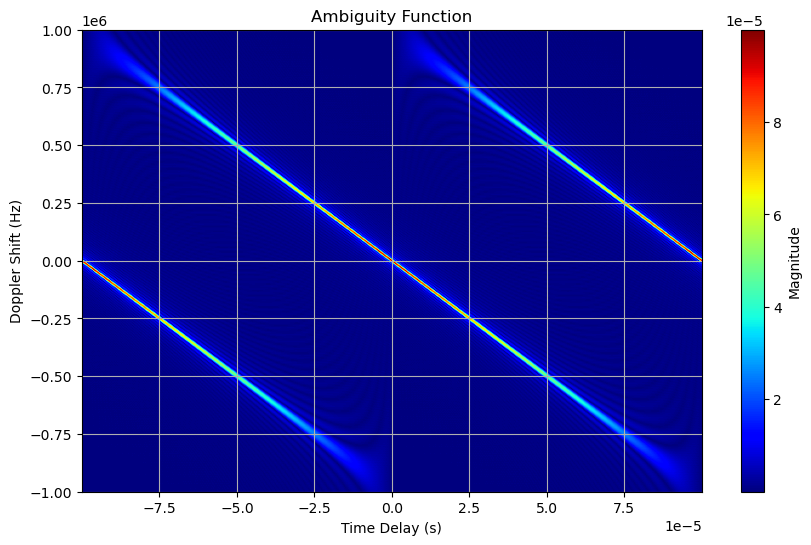

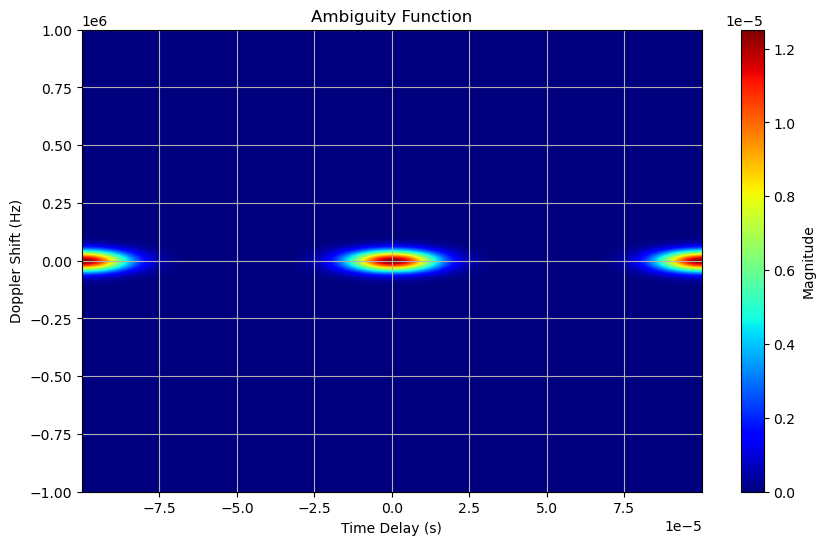

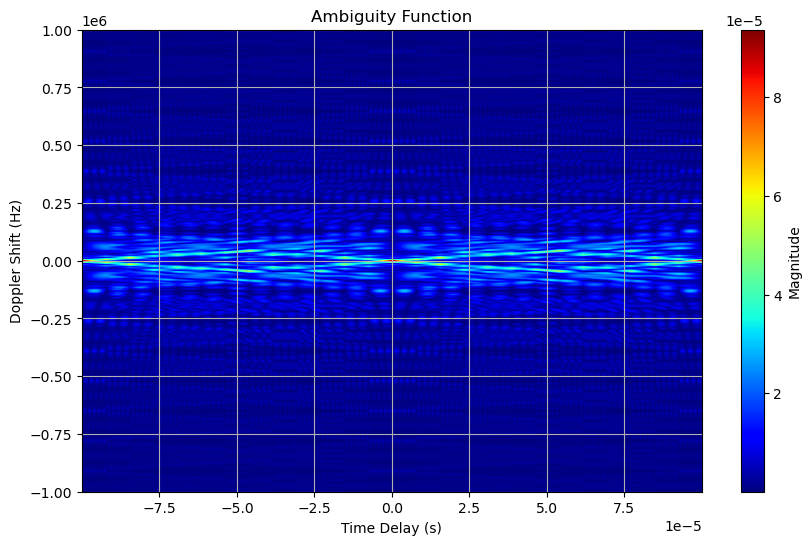

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
from deap.tools import Statistics
from src.pulses import RadarPulseGenerator, CommPulseGenerator, generate_walsh_matrix
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
print(device)
t = torch.linspace(0, 1e-4, int(1e4), device=device)

b = torch.tensor([+1, +1, +1, +1, +1, -1, -1, +1, +1, -1, +1, -1, +1], device=device)
# Define parameters
T = 1e-4       # Total duration of radar pulse (1e-4 seconds)
B = 1e6        # Bandwidth of radar pulse (1 MHz)
K = 5         # Number of users (OFDMA users)
L = 100        # Number of bits in radar pulse duration
Tb = T / L     # Duration of each bit interval
snr_db = 30
Ptotal_dbm = 30
comm_pulse_kind = 'CDMA'
radar_pulse_kind = 'LFM'

myCommPulses = CommPulseGenerator(t, Tb, T, device)
myRadarPulses = RadarPulseGenerator(t, T=T, device=device)

radar_pulse = myRadarPulses.LFM_pulse(B)
radar_pulse2 = myRadarPulses.Gaussian_pulse(B)
radar_pulse3 = myRadarPulses.Barker_pulse(b)

# Define delays and Doppler shifts
delays = torch.linspace(-1e-4, 1e-4, 512)  # Time delays in seconds
doppler_shifts = torch.linspace(-1e6, 1e6, 512)  # Doppler shifts in Hz

# Compute ambiguity function
ambiguity = myRadarPulses.compute_ambiguity_function(radar_pulse, delays, doppler_shifts)
# ambiguity = myRadarPulses.fast_ambiguity(radar_pulse, radar_pulse)

# Create the figure and axis
fig1, ax1 = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the ambiguity function
cax = ax1.imshow(
    np.real(ambiguity.cpu().numpy()),  # Real part of the ambiguity function
    extent=[delays.min(), delays.max(), doppler_shifts.min(), doppler_shifts.max()],
    origin="lower",
    aspect="auto",  # Automatically adjust the aspect ratio
    cmap="jet"  # Use a colormap for better visualization
)

# Add title and labels
ax1.set_title("Ambiguity Function")
ax1.set_xlabel("Time Delay (s)")
ax1.set_ylabel("Doppler Shift (Hz)")

# Add a colorbar
cbar = fig1.colorbar(cax, ax=ax1, label="Magnitude")

# Add gridlines
ax1.grid()

ambiguity = myRadarPulses.compute_ambiguity_function(radar_pulse2, delays, doppler_shifts)
# ambiguity = myRadarPulses.fast_ambiguity(radar_pulse2, radar_pulse2)
fig2, ax2 = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the ambiguity function
cax = ax2.imshow(
    np.real(ambiguity.cpu().numpy()),  # Real part of the ambiguity function
    extent=[delays.min(), delays.max(), doppler_shifts.min(), doppler_shifts.max()],
    origin="lower",
    aspect="auto",  # Automatically adjust the aspect ratio
    cmap="jet"  # Use a colormap for better visualization
)

# Add title and labels
ax2.set_title("Ambiguity Function")
ax2.set_xlabel("Time Delay (s)")
ax2.set_ylabel("Doppler Shift (Hz)")

# Add a colorbar
cbar = fig2.colorbar(cax, ax=ax2, label="Magnitude")

# Add gridlines
ax2.grid()

ambiguity = myRadarPulses.compute_ambiguity_function(radar_pulse3, delays, doppler_shifts)
# ambiguity = myRadarPulses.fast_ambiguity(radar_pulse3, radar_pulse3)
fig3, ax3 = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the ambiguity function
cax = ax3.imshow(
    np.real(ambiguity.cpu().numpy()),  # Real part of the ambiguity function
    extent=[delays.min(), delays.max(), doppler_shifts.min(), doppler_shifts.max()],
    origin="lower",
    aspect="auto",  # Automatically adjust the aspect ratio
    cmap="jet"  # Use a colormap for better visualization
)

# Add title and labels
ax3.set_title("Ambiguity Function")
ax3.set_xlabel("Time Delay (s)")
ax3.set_ylabel("Doppler Shift (Hz)")

# Add a colorbar
cbar = fig3.colorbar(cax, ax=ax3, label="Magnitude")

# Add gridlines
ax3.grid()
# Save the figure as a PDF
# fig1.savefig("ambiguity.pdf", format="pdf", bbox_inches="tight")

# Display the plot
plt.show()

In [ ]:
2e8*1.5e-6 / 2
500e-12*2e8